# Task 8 - Level 2 - Unveiling the Android App Market: Analyzing Google Play Store Data

Clean, categorize, and visualize Google Play Store data to understand app market dynamics. Gain in-depth insights into the Android app market by leveraging data analytics, visualization, and enhanced interpretation skills.

<b> Dataset - </b> https://www.kaggle.com/datasets/utshabkumarghosh/android-app-market-on-google-play

<b> Done By - </b> Shweta Alukuru Trikutam

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Reading

In [4]:
df_app = pd.read_csv(r"C:\Users\shwet\Downloads\datasets\apps.csv")
df_app.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df_review = pd.read_csv(r"C:\Users\shwet\Downloads\datasets\user_reviews.csv")
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [7]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
df_app.shape

(9659, 14)

In [9]:
df_review.shape

(64295, 5)

In [10]:
df_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [11]:
df_app.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


## 3. Data Preprocessing

In [14]:
# Convert 'Installs' and 'Price' to numeric in df_app
df_app['Installs'] = df_app['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df_app['Price'] = df_app['Price'].str.replace('$', '').astype(float)

### Checking Missing Values

In [12]:
df_app.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
df_review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [15]:
df_app['Rating'].fillna(df_app['Rating'].median(), inplace=True)
df_app['Size'].fillna(df_app['Size'].median(), inplace=True)

In [18]:
# Drop rows where Current Ver or Android Ver is missing
df_app_cleaned = df_app.dropna(subset=['Current Ver', 'Android Ver'])

# Verify the result
print(df_app_cleaned[['Current Ver', 'Android Ver']].isnull().sum())
print(f"Remaining rows: {df_app_cleaned.shape[0]}")

Current Ver    0
Android Ver    0
dtype: int64
Remaining rows: 9649


In [21]:
df_app_cleaned.isna().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
# Drop rows with missing values in the Sentiment-related columns
df_review_cleaned = df_review.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Check the cleaned dataset
print("After dropping rows with missing sentiment data:")
print(df_review_cleaned.isnull().sum())
print(f"Remaining rows: {df_review_cleaned.shape[0]}")

After dropping rows with missing sentiment data:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64
Remaining rows: 37427


In [22]:
# Convert 'Last Updated' to datetime
df_app_cleaned['Last Updated'] = pd.to_datetime(df_app_cleaned['Last Updated'])

## 4. EDA

### 4.1 Most Popular App Categories

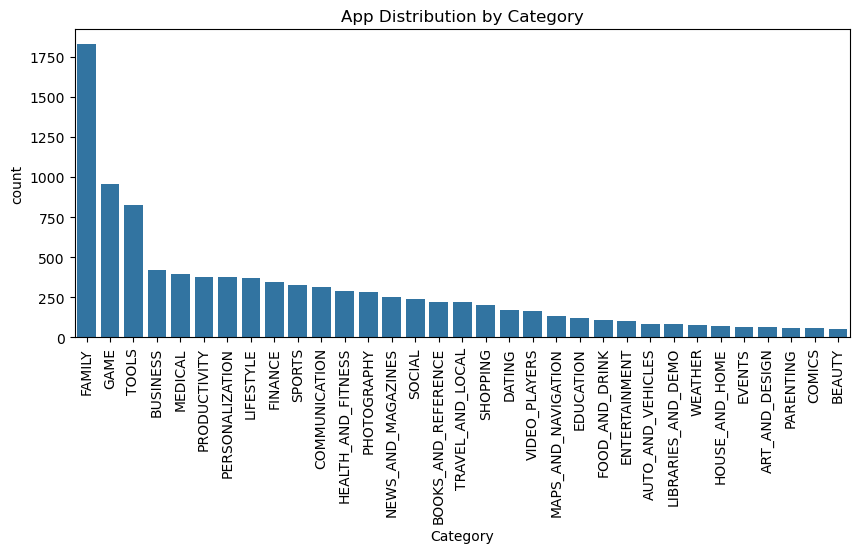

In [24]:
# App distribution by Category
plt.figure(figsize=(10,4))
sns.countplot(data=df_app_cleaned, x='Category', order=df_app_cleaned['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('App Distribution by Category')
plt.show()

> `Family` category has the highest count

### 4.2 Distribution of App Ratings

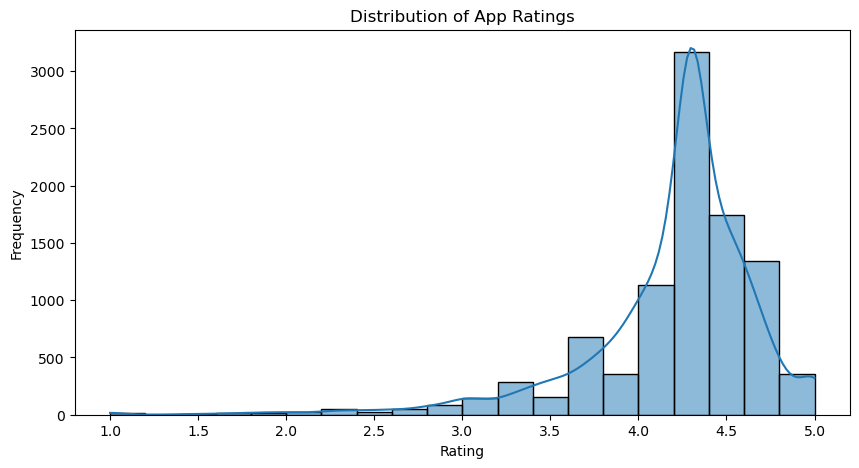

In [25]:
# Rating distribution
plt.figure(figsize=(10,5))
sns.histplot(df_app_cleaned['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

> App Ratings between `4.0 & 4.5` have highest frequency

### 4.3 Relationship Between App Size and Rating

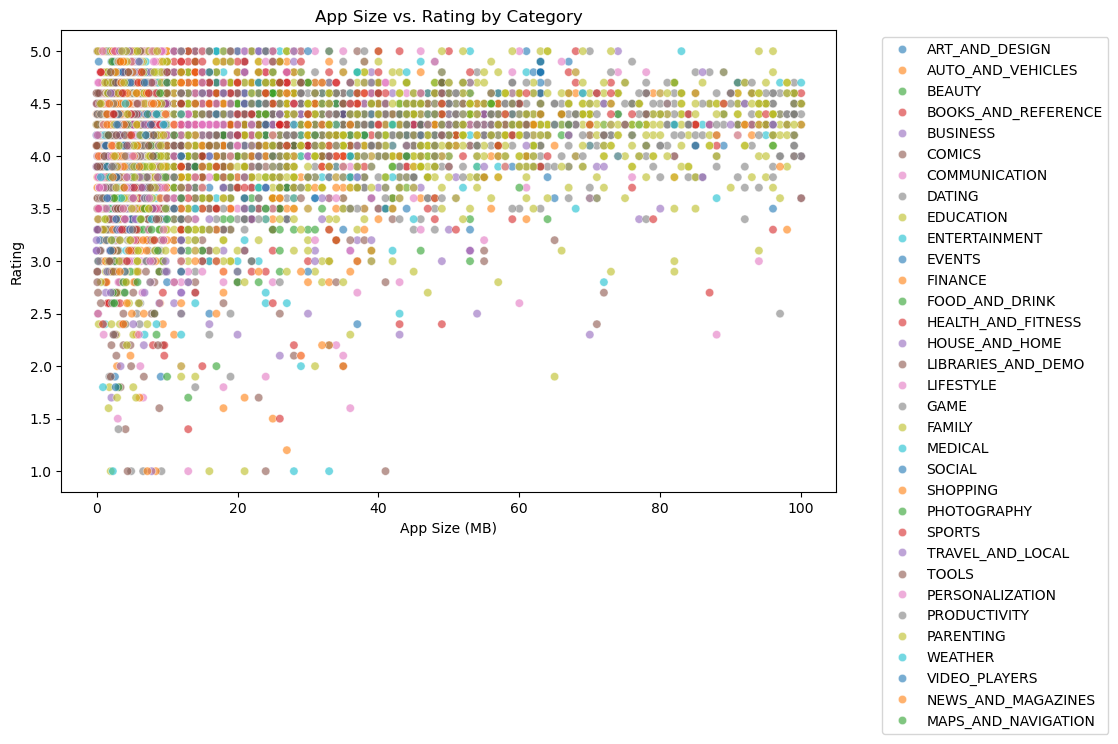

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', hue='Category', data=df_app, alpha=0.6, palette='tab10')
plt.title('App Size vs. Rating by Category')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 4.4 Pricing Analysis

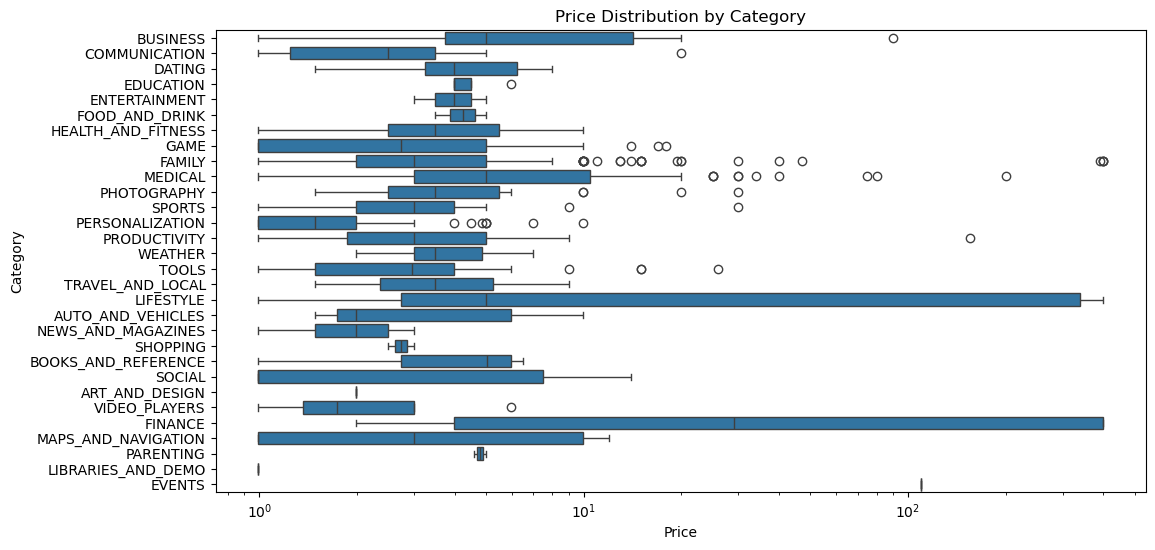

In [27]:
df_paid_apps = df_app_cleaned[df_app_cleaned['Price'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Price', y='Category', data=df_paid_apps)
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.xscale('log')  # Log scale for better visualization of price ranges
plt.show()


>`Lifestyle` and `Finance` category have higher price distribution

### 4.5 Content Rating Distribution

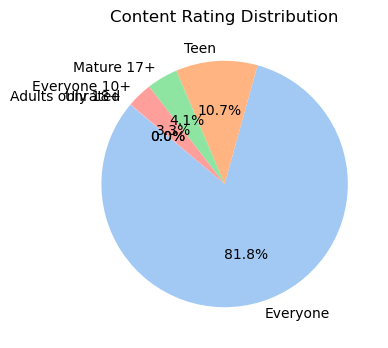

In [29]:
plt.figure(figsize=(4, 4))
df_app_cleaned['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Content Rating Distribution')
plt.ylabel('')
plt.show()


> Content Rating distribution is high for `Everyone` category 

### 4.6 Number of Installs by Category

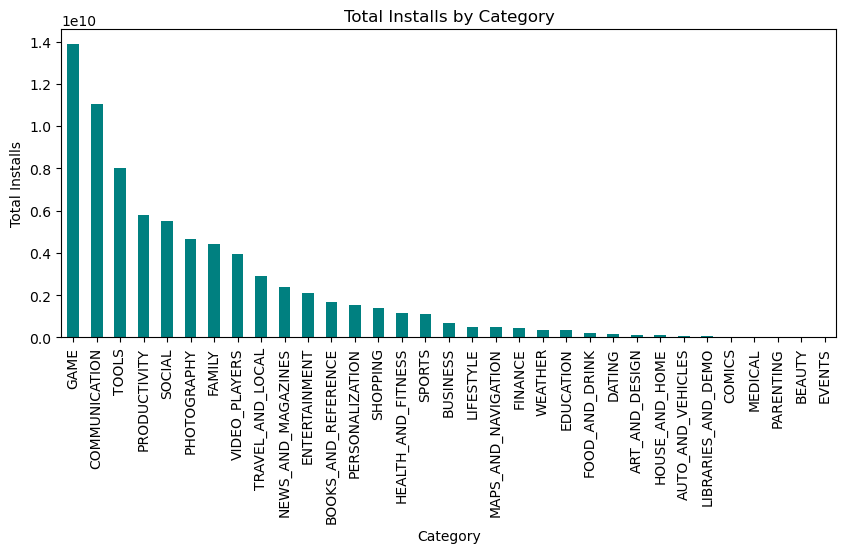

In [32]:
installs_by_category = df_app_cleaned.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
installs_by_category.plot(kind='bar', color='teal')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()


> `Game` has higher number of installs

### 4.7 Sentiment Analysis in Reviews

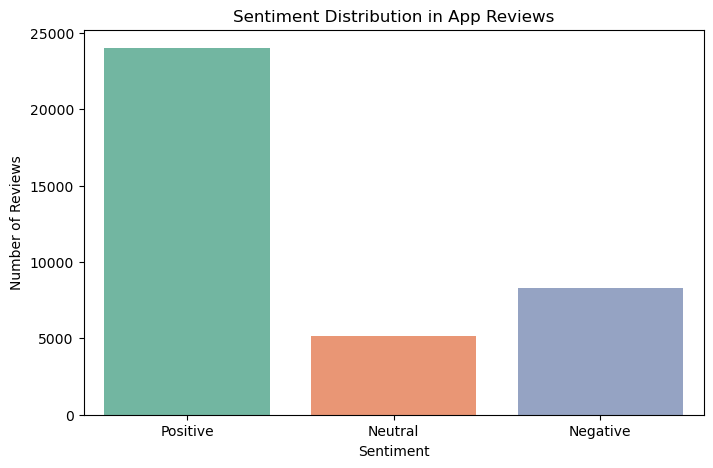

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_review_cleaned, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution in App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


> `Positive` sentiment has higher number of reviews

### 4.8 Average Sentiment Polarity by Category

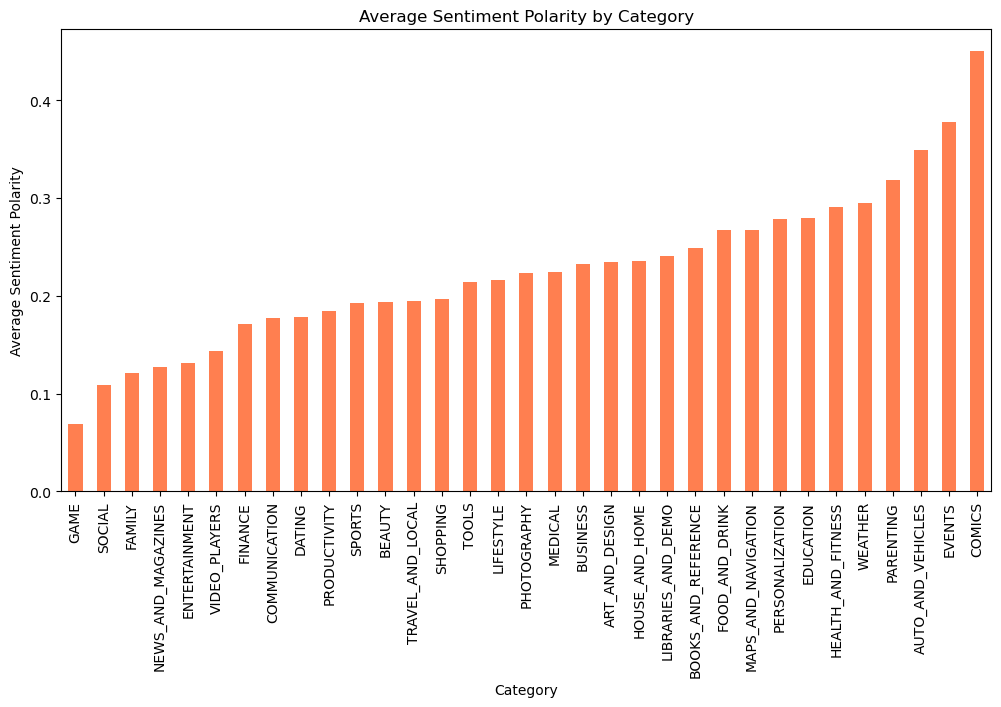

In [34]:
# Merge df_app and df_review on the 'App' column
df_merged = pd.merge(df_app_cleaned, df_review_cleaned, on='App')

# Calculate average sentiment polarity by category
avg_sentiment_polarity = df_merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_sentiment_polarity.plot(kind='bar', color='coral')
plt.title('Average Sentiment Polarity by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Polarity')
plt.show()


> `Comics` category has highest Sentiment Polarity follwed by `Events` category

### 4.9 Update Frequency Analysis

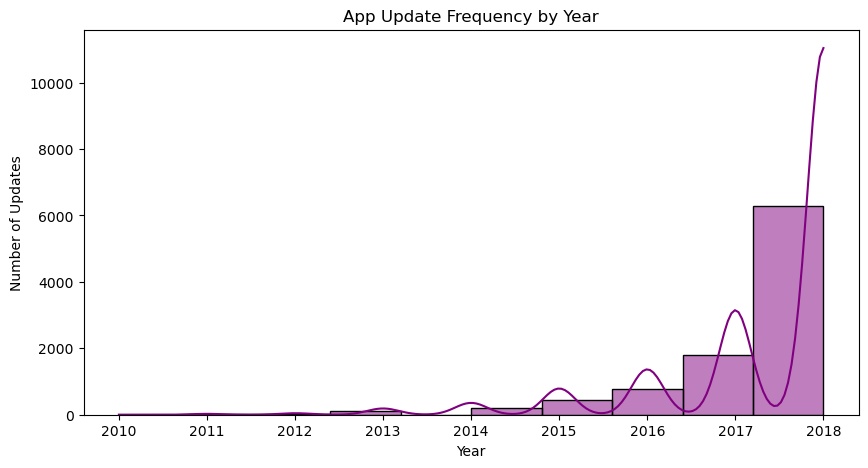

In [35]:
df_app_cleaned['Last Updated'] = pd.to_datetime(df_app_cleaned['Last Updated'])
df_app_cleaned['Last Updated Year'] = df_app_cleaned['Last Updated'].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df_app_cleaned['Last Updated Year'], bins=10, kde=True, color='purple')
plt.title('App Update Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.show()


> The number of updates is seen to be higher between the years `2017 - 2018`